In [2]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline


In [3]:

df_train =  pd.read_csv('../input/train.csv', nrows = 1000000, parse_dates=["pickup_datetime"])

df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
!nvidia-smi

Wed Sep  4 17:22:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
df_train=df_train.drop(columns=['key'])

In [6]:
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()


In [7]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype              
---  ------             --------------    -----              
 0   fare_amount        1000000 non-null  float64            
 1   pickup_datetime    1000000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   1000000 non-null  float64            
 3   pickup_latitude    1000000 non-null  float64            
 4   dropoff_longitude  999990 non-null   float64            
 5   dropoff_latitude   999990 non-null   float64            
 6   passenger_count    1000000 non-null  int64              
 7   day_of_week        1000000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 61.0+ MB


In [8]:

df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [9]:

df_train.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
day_of_week           0
dtype: int64

In [10]:
df_train=df_train.dropna()

In [11]:
df_train['year']=df_train['pickup_datetime'].dt.year

In [12]:
df_train['day']=df_train['pickup_datetime'].dt.day

In [13]:
df_train['hour']=df_train['pickup_datetime'].dt.hour


In [14]:
df_train['month']=df_train['pickup_datetime'].dt.month

In [15]:
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,day,hour,month
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,Monday,2009,15,17,6
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,Tuesday,2010,5,16,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,Thursday,2011,18,0,8
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,Saturday,2012,21,4,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,Tuesday,2010,9,7,3


In [16]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day,hour,month
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941,2011.741103,15.697996,13.509463,6.267841
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907,1.860761,8.682472,6.513855,3.436230
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,2009.000000,1.000000,0.000000,1.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,2010.000000,8.000000,9.000000,3.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,2012.000000,16.000000,14.000000,6.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,2013.000000,23.000000,19.000000,9.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,2015.000000,31.000000,23.000000,12.000000


In [17]:
df_train=df_train.loc[df_train.fare_amount > 0]


In [18]:
def find_outliers_IQR(df):
        
        
    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df>(q1-1.5*IQR)) | (df<(q3+1.5*IQR)))]

    return outliers

In [19]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [20]:
df_train['distance']=haversine(df_train['pickup_latitude'], df_train['pickup_longitude'], df_train['dropoff_latitude'], df_train['dropoff_longitude'])


In [21]:
# df_train[(df_train['pickup_longitude']>90) & (df_train['dropoff_latitude']<-90)]
df_train.loc[(df_train.pickup_latitude > 90)]



,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,day,hour,month,distance
5686,3.3,2011-07-30 11:15:00+00:00,-73.947235,401.083332,-73.951392,40.778927,1,Saturday,2011,30,11,7,33.850093
174356,9.7,2011-11-21 21:36:00+00:00,2140.601160,1703.092772,-1251.195890,-1189.615440,1,Monday,2011,21,21,11,2880.049865
272439,9.3,2011-04-23 02:55:00+00:00,-74.002497,405.350000,-73.978600,40.739962,1,Saturday,2011,23,2,4,512.616508
464025,6.9,2012-03-05 20:58:00+00:00,-73.994268,404.966667,-73.973857,40.755457,1,Monday,2012,5,20,3,468.268137
505229,9.3,2012-03-05 21:08:00+00:00,-73.994268,404.966667,-73.986387,40.776895,1,Monday,2012,5,21,3,465.881832
505583,8.5,2012-03-16 08:13:00+00:00,-73.994277,405.133332,-73.956763,40.783737,1,Friday,2012,16,8,3,483.662515
688685,17.3,2012-03-22 21:40:00+00:00,2522.271325,2621.628430,-1718.117653,-2864.471003,1,Thursday,2012,22,21,3,8547.235647
708059,5.3,2012-05-24 22:44:00+00:00,-73.989188,91.266667,-73.982362,40.763105,1,Thursday,2012,24,22,5,5615.739871
970268,5.7,2012-04-12 07:31:00+00:00,-73.957087,424.083332,-73.968312,40.765117,1,Thursday,2012,12,7,4,2592.867309


In [22]:
df_train.loc[(df_train.dropoff_latitude > 90) ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,year,day,hour,month,distance
92310,28.9,2011-09-27 11:54:00+00:00,-74.014595,40.681880,-73.973310,404.616667,1,Tuesday,2011,27,11,9,437.541362
181973,6.5,2012-01-03 09:04:00+00:00,-74.008918,40.717827,-74.000855,404.133332,1,Tuesday,2012,3,9,1,379.787404
335675,19.3,2012-02-26 00:25:00+00:00,-74.006457,40.743865,-73.981283,404.133332,1,Sunday,2012,26,0,2,376.897190
543001,5.3,2011-10-28 13:53:00+00:00,-3377.680935,-113.019497,-554.918693,314.794180,1,Friday,2011,28,13,10,6641.944366
561910,4.5,2010-08-14 03:42:59+00:00,-73.977635,40.754687,-73.870432,405.650000,1,Saturday,2010,14,3,8,544.403166
582110,30.5,2012-05-02 14:20:00+00:00,-73.870875,40.773792,-73.977790,404.716667,1,Wednesday,2012,2,14,5,438.514494
748464,15.0,2013-01-02 11:33:00+00:00,-74.015200,40.709665,-40.719295,1651.553433,5,Wednesday,2013,2,11,1,16878.303157
889704,15.3,2012-05-21 12:15:00+00:00,-74.001292,40.727560,-73.953047,404.466667,1,Monday,2012,21,12,5,415.788459


In [23]:
df_train=df_train.loc[((df_train.dropoff_latitude < 90) & (df_train.pickup_latitude < 90))]



In [24]:
df=df_train.copy()

In [25]:
df=df.drop(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','pickup_datetime'])


In [26]:
df.loc[((df['distance'] <1)&(df['fare_amount'] >25))]
# df_train.loc[(df_train.dropoff_latitude < 90) ]

,fare_amount,passenger_count,day_of_week,year,day,hour,month,distance
105,52.00,1,Wednesday,2009,25,0,3,0.000000
333,26.50,5,Saturday,2010,27,20,2,0.086462
510,49.57,2,Saturday,2010,23,18,10,0.000279
737,57.33,2,Monday,2014,11,19,8,0.000000
966,28.00,1,Monday,2015,8,1,6,0.000000
...,...,...,...,...,...,...,...,...
999006,45.00,2,Thursday,2011,29,6,12,0.000000
999454,49.80,1,Friday,2012,27,13,4,0.000590
999728,49.80,1,Tuesday,2012,22,15,5,0.755262
999916,50.00,1,Wednesday,2011,9,12,3,0.001422


In [27]:
df=df.loc[~((df['distance']<1)&(df['fare_amount'] >25))]
df=df.loc[~((df['distance']<2)&(df['fare_amount'] >120))]
df=df.loc[~((df['distance']<10)&(df['fare_amount'] >100))]
df=df.loc[~((df['distance']>100)&(df['fare_amount'] <20))]

df = df.loc[~((df['distance']>30)&(df['fare_amount'] <50))]



In [28]:
df['hour']=df['hour'].round(0)

In [29]:
df

,fare_amount,passenger_count,day_of_week,year,day,hour,month,distance
0,4.5,1,Monday,2009,15,17,6,1.030764
1,16.9,1,Tuesday,2010,5,16,1,8.450134
2,5.7,2,Thursday,2011,18,0,8,1.389525
3,7.7,1,Saturday,2012,21,4,4,2.799270
4,5.3,1,Tuesday,2010,9,7,3,1.999157
...,...,...,...,...,...,...,...,...
999995,7.0,1,Saturday,2014,13,21,9,1.879763
999996,7.3,2,Monday,2010,20,14,9,0.000000
999997,10.5,5,Friday,2013,26,14,4,1.761741
999998,6.9,1,Friday,2011,8,0,7,1.842683


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
  
# Encode labels in column 'species'. 
df['day_of_week']=label_encoder.fit_transform(df['day_of_week']) 

In [31]:
from scipy.stats import pointbiserialr
pointbiserialr(df['day_of_week'],df['fare_amount'])


SignificanceResult(statistic=-0.0007730101205919024, pvalue=0.44096135970144607)

In [32]:
df.head()
df.describe()
# df.describe()


,fare_amount,passenger_count,day_of_week,year,day,hour,month,distance
count,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000
mean,11.187708,1.685435,2.992845,2011.740334,15.698137,13.511622,6.267544,4.268808
std,9.324050,1.324375,2.016768,1.860952,8.682631,6.513233,3.436721,93.210009
min,0.010000,0.000000,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,1.000000,2010.000000,8.000000,9.000000,3.000000,1.220934
50%,8.500000,1.000000,3.000000,2012.000000,16.000000,14.000000,6.000000,2.120001
75%,12.500000,2.000000,5.000000,2013.000000,23.000000,19.000000,9.000000,3.874637
max,495.000000,208.000000,6.000000,2015.000000,31.000000,23.000000,12.000000,8699.681549


In [33]:
fare_amount=df['fare_amount']
df=df.drop(columns=['fare_amount'])

df['fare_amount']=fare_amount

In [34]:
# df=df.drop(columns=['day'])


<Axes: >

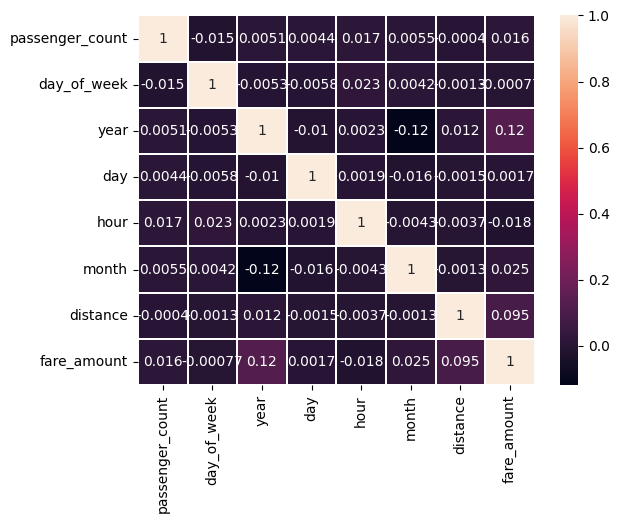

In [35]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linewidths=0.1,annot=True)

In [38]:
df.loc[df['distance']<0.01]

,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
11,3,1,2012,24,11,12,0.000000,5.5
15,1,2,2013,23,12,11,0.000000,5.0
26,1,1,2011,7,20,2,0.000000,6.5
124,2,4,2013,17,17,1,0.000000,8.0
184,2,6,2013,6,14,2,0.003982,4.5
...,...,...,...,...,...,...,...,...
999835,1,6,2013,13,10,3,0.000842,2.5
999888,3,6,2010,28,21,4,0.000000,9.3
999915,2,1,2014,12,2,5,0.000000,8.0
999931,5,1,2012,5,22,3,0.000000,6.9


In [39]:


df.loc[df['fare_amount']>70]

,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
2013,1,1,2012,27,15,8,17.988797,77.00
2639,1,4,2013,3,9,10,17.380198,79.00
4013,2,6,2009,13,14,5,19.157926,77.70
4620,1,5,2012,21,20,8,18.572564,85.50
6668,1,5,2014,28,5,10,17.012878,76.80
...,...,...,...,...,...,...,...,...
996115,4,5,2014,17,21,6,23.484191,76.83
997584,2,5,2009,13,14,10,33.875578,99.30
998024,1,4,2009,9,15,4,17.814158,75.50
998440,4,1,2015,19,8,1,19.023745,77.00


/tmp/ipykernel_36/289970378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day_of_week'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_of_week', ylabel='Density'>

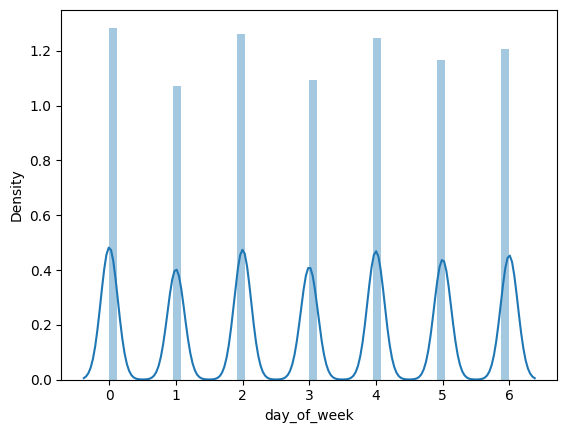

In [40]:
sns.distplot(df['day_of_week'])


/tmp/ipykernel_36/365097054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Density'>

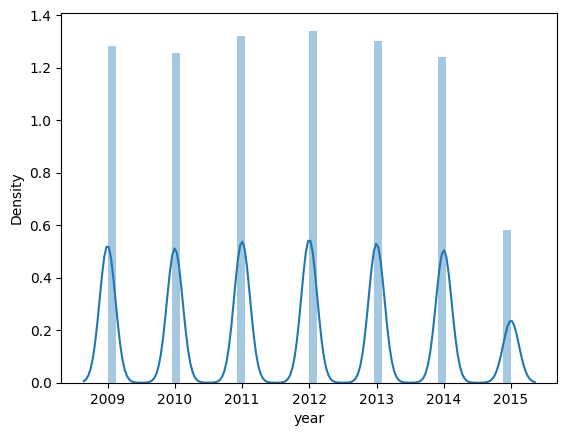

In [41]:
sns.distplot(df['year'])


In [42]:
df.describe()

,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
count,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000
mean,1.685435,2.992845,2011.740334,15.698137,13.511622,6.267544,4.268808,11.187708
std,1.324375,2.016768,1.860952,8.682631,6.513233,3.436721,93.210009,9.324050
min,0.000000,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000,0.010000
25%,1.000000,1.000000,2010.000000,8.000000,9.000000,3.000000,1.220934,6.000000
50%,1.000000,3.000000,2012.000000,16.000000,14.000000,6.000000,2.120001,8.500000
75%,2.000000,5.000000,2013.000000,23.000000,19.000000,9.000000,3.874637,12.500000
max,208.000000,6.000000,2015.000000,31.000000,23.000000,12.000000,8699.681549,495.000000


/tmp/ipykernel_36/1589141685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day', ylabel='Density'>

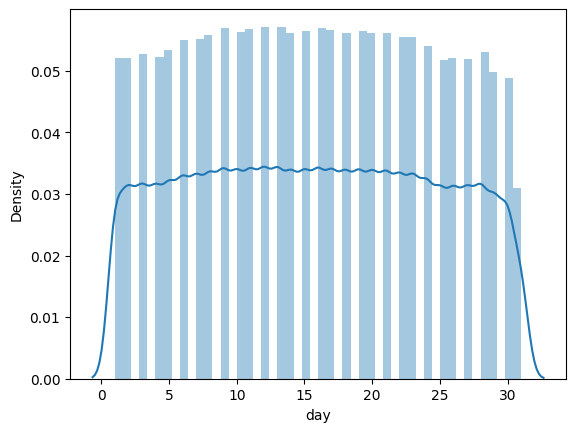

In [43]:
sns.distplot(df['day'])


/tmp/ipykernel_36/285974237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hour'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour', ylabel='Density'>

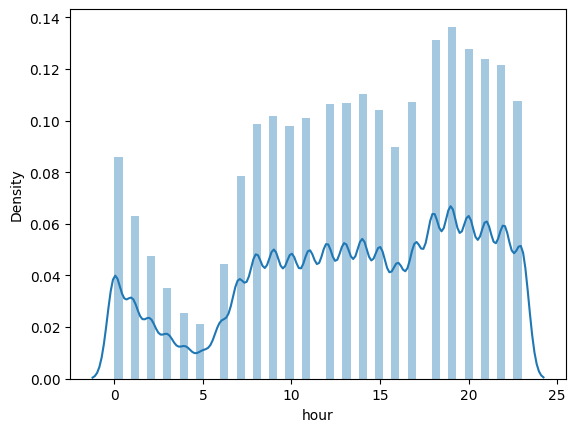

In [44]:
sns.distplot(df['hour'])


In [45]:
df.describe()

,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
count,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000,993701.000000
mean,1.685435,2.992845,2011.740334,15.698137,13.511622,6.267544,4.268808,11.187708
std,1.324375,2.016768,1.860952,8.682631,6.513233,3.436721,93.210009,9.324050
min,0.000000,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000,0.010000
25%,1.000000,1.000000,2010.000000,8.000000,9.000000,3.000000,1.220934,6.000000
50%,1.000000,3.000000,2012.000000,16.000000,14.000000,6.000000,2.120001,8.500000
75%,2.000000,5.000000,2013.000000,23.000000,19.000000,9.000000,3.874637,12.500000
max,208.000000,6.000000,2015.000000,31.000000,23.000000,12.000000,8699.681549,495.000000


/tmp/ipykernel_36/1123890760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Density'>

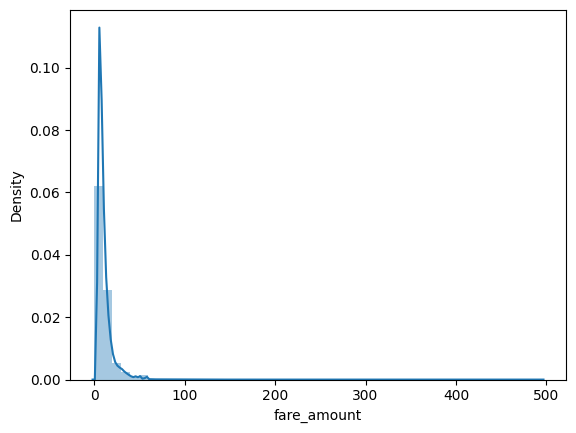

In [46]:
sns.distplot(df['fare_amount'])


/tmp/ipykernel_36/1331580065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance', ylabel='Density'>

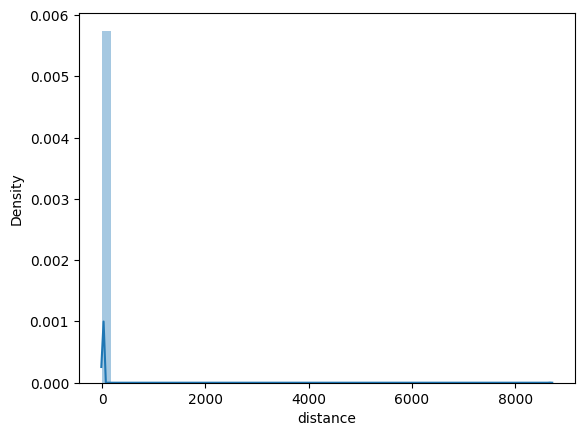

In [47]:
sns.distplot(df['distance'])


In [48]:

df.loc[(df['distance'] >50)]


,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
12983,1,4,2013,7,21,3,8664.131808,57.33
29007,1,5,2009,24,11,3,104.034965,50.00
31823,1,5,2013,26,18,11,8667.572331,52.00
45139,1,4,2015,4,14,6,376.445536,57.54
82573,4,0,2012,30,10,3,8647.250204,59.80
...,...,...,...,...,...,...,...,...
984285,1,2,2013,19,16,10,8647.351019,57.33
991435,1,6,2010,2,8,6,55.067573,134.67
991749,1,6,2013,3,16,4,60.819037,145.16
992056,2,2,2012,21,3,7,8669.357209,55.50


In [49]:
df=df.loc[(df['distance'] <50)]


/tmp/ipykernel_36/285974237.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hour'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='hour', ylabel='Density'>

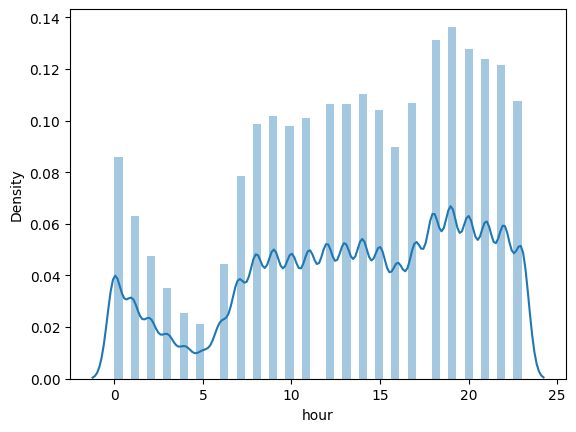

In [50]:
sns.distplot(df['hour'])


<Axes: >

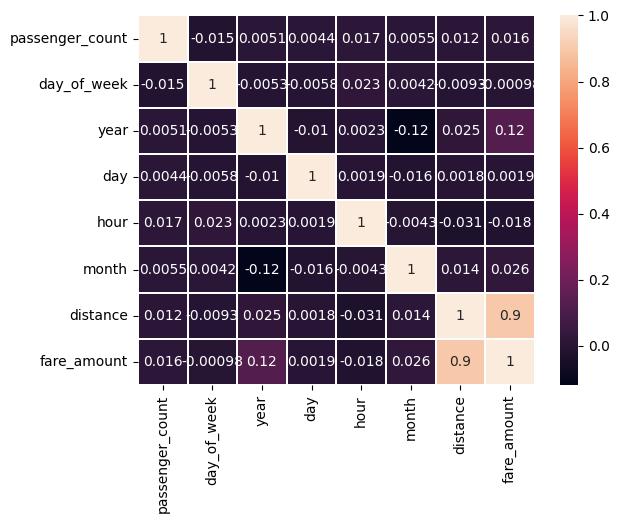

In [51]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linewidths=0.1,annot=True)

In [54]:
df.describe()

,passenger_count,day_of_week,year,day,hour,month,distance,fare_amount
count,993558.000000,993558.000000,993558.000000,993558.000000,993558.000000,993558.000000,993558.000000,993558.000000
mean,1.685453,2.992846,2011.740095,15.698314,13.511813,6.267644,3.264540,11.176655
std,1.324394,2.016794,1.860908,8.682510,6.513238,3.436738,3.569137,9.243613
min,0.000000,0.000000,2009.000000,1.000000,0.000000,1.000000,0.000000,0.010000
25%,1.000000,1.000000,2010.000000,8.000000,9.000000,3.000000,1.220838,6.000000
50%,1.000000,3.000000,2012.000000,16.000000,14.000000,6.000000,2.119606,8.500000
75%,2.000000,5.000000,2013.000000,23.000000,19.000000,9.000000,3.873216,12.500000
max,208.000000,6.000000,2015.000000,31.000000,23.000000,12.000000,49.698313,207.050000


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler().fit(df[['year','distance']])
X_train=scaler.transform(df[['year','distance']])

X_train, X_test, y_train, y_test = train_test_split(X_train,df['fare_amount'] , 
                                   random_state=42,  
                                   test_size=0.10,  
                                   shuffle=True) 




In [ ]:
X_train

In [51]:
model = LinearRegression().fit(X_train, y_train)


In [52]:
model.score(X_test, y_test)

0.818797943926697

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


y_preds=model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)



In [53]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [54]:
regressor.score(X_test, y_test)

0.6936407991599568

In [ ]:
y_preds=regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)


In [ ]:
mae,mse

In [ ]:
X_train['day_of_week']

In [ ]:
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)


In [ ]:
print("The best hyperparameters are ",search.best_params_)

In [59]:
regr.score(X_test, y_test)

0.7839225724411845

In [60]:
y_preds=regr.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)


In [62]:
mae,mse

(2.4772580038111447, 18.57866450692285)

In [ ]:
from sklearn.feature_selection import f_classif
f_value, p_value = f_classif(df['day_of_week'].values.reshape(-1, 1), df.fare_amount)

print("F-value:", f_value)
print("P-value:", p_value)


In [71]:
import xgboost as xgb


#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
regressor=xgb.XGBRegressor(eval_metric='rmsle',gpu_id=0 )
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}


In [76]:
regressor=xgb.XGBRegressor(eval_metric='rmsle',gpu_id=0,learning_rate=0.015,max_depth=4,n_estimators=700 ).fit(X_train, y_train)


In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
regressor.score(X_test, y_test)
y_preds=regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
mae,mse

(2.0800810332891277, 14.262125115990331)

In [78]:
regressor.score(X_test, y_test)


0.834125681884355

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus = tf.config.list_physical_devices('GPU')


In [2]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if "GPU" not in device_name:
    print("GPU device not found")
    
print('Found GPU at: {}'.format(device_name))

print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Found GPU at: /device:GPU:0
GPU available (YESS!!!!)


In [ ]:
regressor = xgb.XGBRegressor(
    eval_metric='rmsle',  # Evaluation metric
    tree_method='gpu_hist',  # Use GPU for training
    gpu_id=0  # Specify GPU id (0 for the first GPU)
)